In [1]:
import pandas as pd  # data frame operations  
import numpy as np  # arrays and math functions
import matplotlib.pyplot as plt  # static plotting
import seaborn as sns  # pretty plotting, including heat map


In [2]:
# correlation heat map setup for seaborn
def corr_chart(df_corr):
    corr=df_corr.corr()
    #screen top half to get a triangle
    top = np.zeros_like(corr, dtype=np.bool)
    top[np.triu_indices_from(top)] = True
    fig=plt.figure()
    fig, ax = plt.subplots(figsize=(12,12))
    sns.heatmap(corr, mask=top, cmap='coolwarm', 
        center = 0, square=True, 
        linewidths=.5, cbar_kws={'shrink':.5}, 
        annot = True, annot_kws={'size': 9}, fmt = '.3f')           
    plt.xticks(rotation=45) # rotate variable labels on columns (x axis)
    plt.yticks(rotation=0) # use horizontal variable labels on rows (y axis)
    plt.title('Correlation Heat Map')   
    plt.savefig('plot-corr-map.pdf', 
        bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
        orientation='portrait', papertype=None, format=None, 
        transparent=True, pad_inches=0.25, frameon=None)      

np.set_printoptions(precision=3)


In [29]:
# read in comma-delimited text file, creating a pandas DataFrame object
# note that IPAddress is formatted as an actual IP address
# but is actually a random-hash of the original IP address
valid_survey_input = pd.read_csv('mspa-survey-data.csv')

# use the RespondentID as label for the rows... the index of DataFrame
valid_survey_input.set_index('RespondentID', drop = True, inplace = True)

# examine the structure of the DataFrame object
print('\nContents of initial survey data ---------------')

# could use len() or first index of shape() to get number of rows/observations
print('\nNumber of Respondents =', len(valid_survey_input)) 

# show the column/variable names of the DataFrame
# note that RespondentID is no longer present
print(valid_survey_input.columns)

# abbreviated printing of the first five rows of the data frame
print(pd.DataFrame.head(valid_survey_input)) 


Contents of initial survey data ---------------

Number of Respondents = 207
Index(['Personal_JavaScalaSpark', 'Personal_JavaScriptHTMLCSS',
       'Personal_Python', 'Personal_R', 'Personal_SAS',
       'Professional_JavaScalaSpark', 'Professional_JavaScriptHTMLCSS',
       'Professional_Python', 'Professional_R', 'Professional_SAS',
       'Industry_JavaScalaSpark', 'Industry_JavaScriptHTMLCSS',
       'Industry_Python', 'Industry_R', 'Industry_SAS',
       'Python_Course_Interest', 'Foundations_DE_Course_Interest',
       'Analytics_App_Course_Interest', 'Systems_Analysis_Course_Interest',
       'Courses_Completed', 'PREDICT400', 'PREDICT401', 'PREDICT410',
       'PREDICT411', 'PREDICT413', 'PREDICT420', 'PREDICT422', 'PREDICT450',
       'PREDICT451', 'PREDICT452', 'PREDICT453', 'PREDICT454', 'PREDICT455',
       'PREDICT456', 'PREDICT457', 'OtherPython', 'OtherR', 'OtherSAS',
       'Other', 'Graduate_Date'],
      dtype='object')
              Personal_JavaScalaSpark  Personal

In [5]:
# shorten the variable/column names for software preference variables
survey_df = valid_survey_input.rename(index=str, columns={
    'Personal_JavaScalaSpark': 'Java',
    'Personal_JavaScriptHTMLCSS': 'JS',
    'Personal_Python': 'Python',
    'Personal_R': 'R',
    'Personal_SAS': 'SAS',
    'Professional_JavaScalaSpark': 'Prof_Java',
    'Professional_JavaScriptHTMLCSS': 'Prof_JS',
    'Professional_Python': 'Prof_Python',
    'Professional_R': 'Prof_R',
    'Professional_SAS': 'Prof_SAS',
    'Industry_JavaScalaSpark': 'Ind_Java',
    'Industry_JavaScriptHTMLCSS': 'Ind_JS',
    'Industry_Python': 'Ind_Python',
    'Industry_R': 'Ind_R',
    'Industry_SAS': 'Ind_SAS'})

# define subset DataFrame for analysis of software preferences 
software_df = survey_df.loc[:, 'Java':'Ind_SAS']
print(pd.DataFrame.head(software_df))
print(software_df.columns)

#describe the data set
software_df.describe(include='all')

              Java  JS  Python   R  SAS  Prof_Java  Prof_JS  Prof_Python  \
RespondentID                                                               
5135740122       0   0       0  50   50          0        0            0   
5133300037      10  10      50  30    0         25       25           30   
5132253300      20   0      40  40    0          0        0           40   
5132096630      10  10      25  35   20         10       10           25   
5131990362      20   0       0  70   10         20        0            0   

              Prof_R  Prof_SAS  Ind_Java  Ind_JS  Ind_Python  Ind_R  Ind_SAS  
RespondentID                                                                  
5135740122        25        75         0       0           0     50       50  
5133300037        20         0        20      25          40     15        0  
5132253300        40        20        30       0          30     40        0  
5132096630        35        20        10      10          25     35     

,Java,JS,Python,R,SAS,Prof_Java,Prof_JS,Prof_Python,Prof_R,Prof_SAS,Ind_Java,Ind_JS,Ind_Python,Ind_R,Ind_SAS
count,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000
mean,10.135266,4.797101,31.304348,37.125604,16.637681,9.251208,5.840580,30.028986,36.415459,18.463768,11.942029,6.966184,29.772947,32.434783,18.884058
std,11.383477,6.757764,15.570982,14.576003,13.626400,13.167505,10.812555,19.144802,20.847606,18.831841,14.706399,10.030721,17.959816,15.912209,19.137623
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,20.000000,30.000000,5.000000,0.000000,0.000000,20.000000,25.000000,0.000000,0.000000,0.000000,20.000000,22.500000,0.000000
50%,9.000000,0.000000,30.000000,35.000000,15.000000,5.000000,0.000000,30.000000,33.000000,15.000000,5.000000,0.000000,30.000000,30.000000,15.000000
75%,20.000000,10.000000,40.000000,50.000000,25.000000,15.000000,10.000000,40.000000,50.000000,30.000000,20.000000,10.000000,40.000000,40.000000,30.000000
max,70.000000,30.000000,90.000000,100.000000,75.000000,80.000000,100.000000,100.000000,100.000000,100.000000,70.000000,50.000000,95.000000,85.000000,100.000000


In [24]:
# descriptive statistics for software preference variables
print('\nDescriptive statistics for survey data ---------------')
print(software_df.describe())

# descriptive statistics for one variable
print('\nDescriptive statistics for courses completed ---------------')
print(survey_df['Courses_Completed'].describe())


Descriptive statistics for survey data ---------------
             Java          JS      Python           R         SAS   Prof_Java  \
count  207.000000  207.000000  207.000000  207.000000  207.000000  207.000000   
mean    10.135266    4.797101   31.304348   37.125604   16.637681    9.251208   
std     11.383477    6.757764   15.570982   14.576003   13.626400   13.167505   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000   20.000000   30.000000    5.000000    0.000000   
50%      9.000000    0.000000   30.000000   35.000000   15.000000    5.000000   
75%     20.000000   10.000000   40.000000   50.000000   25.000000   15.000000   
max     70.000000   30.000000   90.000000  100.000000   75.000000   80.000000   

          Prof_JS  Prof_Python      Prof_R    Prof_SAS    Ind_Java  \
count  207.000000   207.000000  207.000000  207.000000  207.000000   
mean     5.840580    30.028986   36.415459   18.463768   11.942029   
std 

In [6]:
# define subset DataFrame for analysis of software preferences 
software_df_1 = survey_df.loc[:, 'Java':'SAS']
print(pd.DataFrame.head(software_df_1))
print(software_df_1.columns)

#describe the data set
software_df_1.describe(include='all')

              Java  JS  Python   R  SAS
RespondentID                           
5135740122       0   0       0  50   50
5133300037      10  10      50  30    0
5132253300      20   0      40  40    0
5132096630      10  10      25  35   20
5131990362      20   0       0  70   10
Index(['Java', 'JS', 'Python', 'R', 'SAS'], dtype='object')


,Java,JS,Python,R,SAS
count,207.000000,207.000000,207.000000,207.000000,207.000000
mean,10.135266,4.797101,31.304348,37.125604,16.637681
std,11.383477,6.757764,15.570982,14.576003,13.626400
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,20.000000,30.000000,5.000000
50%,9.000000,0.000000,30.000000,35.000000,15.000000
75%,20.000000,10.000000,40.000000,50.000000,25.000000
max,70.000000,30.000000,90.000000,100.000000,75.000000


In [7]:
# define subset DataFrame for analysis of software preferences 
software_df_prof = survey_df.loc[:, 'Prof_Java':'Prof_SAS']
print(pd.DataFrame.head(software_df_prof))
print(software_df_prof.columns)

#describe the data set
software_df_prof.describe(include='all')

              Prof_Java  Prof_JS  Prof_Python  Prof_R  Prof_SAS
RespondentID                                                   
5135740122            0        0            0      25        75
5133300037           25       25           30      20         0
5132253300            0        0           40      40        20
5132096630           10       10           25      35        20
5131990362           20        0            0      80         0
Index(['Prof_Java', 'Prof_JS', 'Prof_Python', 'Prof_R', 'Prof_SAS'], dtype='object')


,Prof_Java,Prof_JS,Prof_Python,Prof_R,Prof_SAS
count,207.000000,207.000000,207.000000,207.000000,207.000000
mean,9.251208,5.840580,30.028986,36.415459,18.463768
std,13.167505,10.812555,19.144802,20.847606,18.831841
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,20.000000,25.000000,0.000000
50%,5.000000,0.000000,30.000000,33.000000,15.000000
75%,15.000000,10.000000,40.000000,50.000000,30.000000
max,80.000000,100.000000,100.000000,100.000000,100.000000


In [8]:
# define subset DataFrame for analysis of software preferences 
software_df_ind = survey_df.loc[:, 'Ind_Java':'Ind_SAS']
print(pd.DataFrame.head(software_df_ind))
print(software_df_ind.columns)

#describe the data set
software_df_ind.describe(include='all')

              Ind_Java  Ind_JS  Ind_Python  Ind_R  Ind_SAS
RespondentID                                              
5135740122           0       0           0     50       50
5133300037          20      25          40     15        0
5132253300          30       0          30     40        0
5132096630          10      10          25     35       20
5131990362          40       0           0     60        0
Index(['Ind_Java', 'Ind_JS', 'Ind_Python', 'Ind_R', 'Ind_SAS'], dtype='object')


,Ind_Java,Ind_JS,Ind_Python,Ind_R,Ind_SAS
count,207.000000,207.000000,207.000000,207.000000,207.000000
mean,11.942029,6.966184,29.772947,32.434783,18.884058
std,14.706399,10.030721,17.959816,15.912209,19.137623
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,20.000000,22.500000,0.000000
50%,5.000000,0.000000,30.000000,30.000000,15.000000
75%,20.000000,10.000000,40.000000,40.000000,30.000000
max,70.000000,50.000000,95.000000,85.000000,100.000000


Text(0.5,1,'Notched Boxplots for Industry Software')

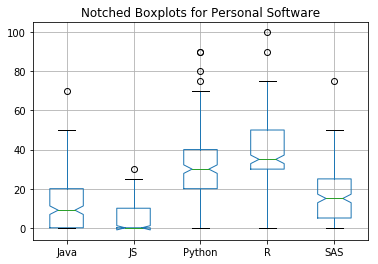

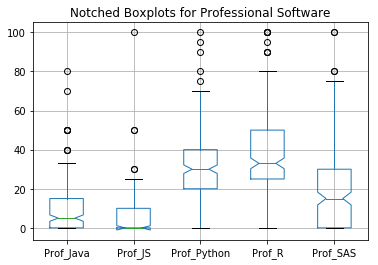

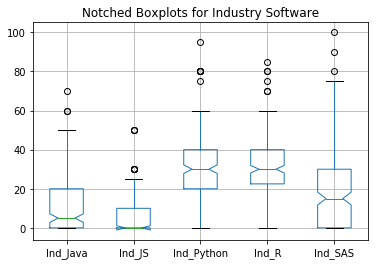

In [54]:
personal_plot = software_df_1.plot.box(grid=1, notch=1)
personal_plot.set_title("Notched Boxplots for Personal Software")

professional_plot = software_df_prof.plot.box(grid=1, notch=1)
professional_plot.set_title("Notched Boxplots for Professional Software")

industry_plot = software_df_ind.plot.box(grid=1, notch=1)
industry_plot.set_title("Notched Boxplots for Industry Software")

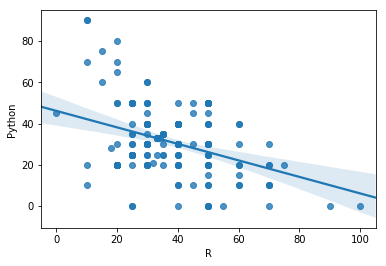

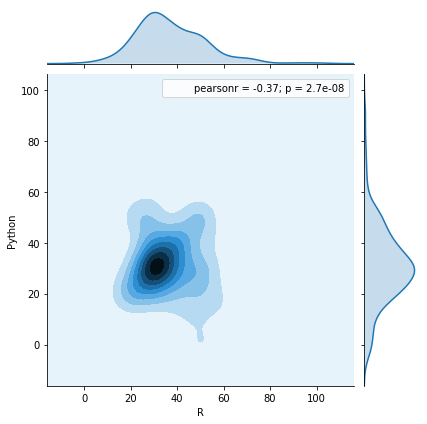

In [14]:
#single scatterplot example
fig,ax = plt.subplots()
ax = sns.regplot(x="R", y="Python", data=software_df_1)

#joint plot
sns.jointplot(x="R", y="Python", data=software_df_1, kind="kde")

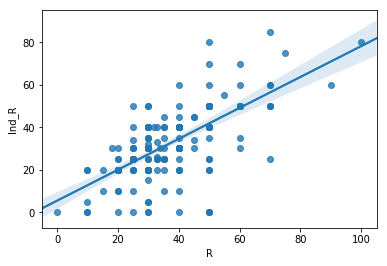

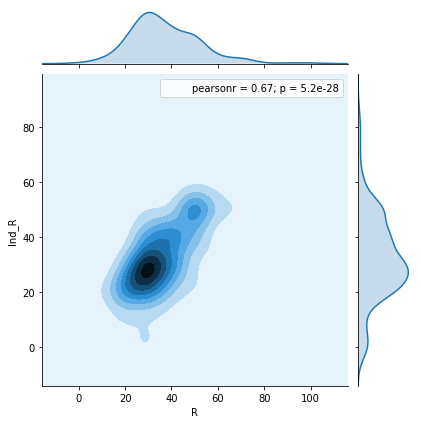

In [16]:
#single scatterplot example
fig,ax = plt.subplots()
ax = sns.regplot(x="R", y="Ind_R", data=software_df)

#joint plot
sns.jointplot(x="R", y="Ind_R", data=software_df, kind="kde")

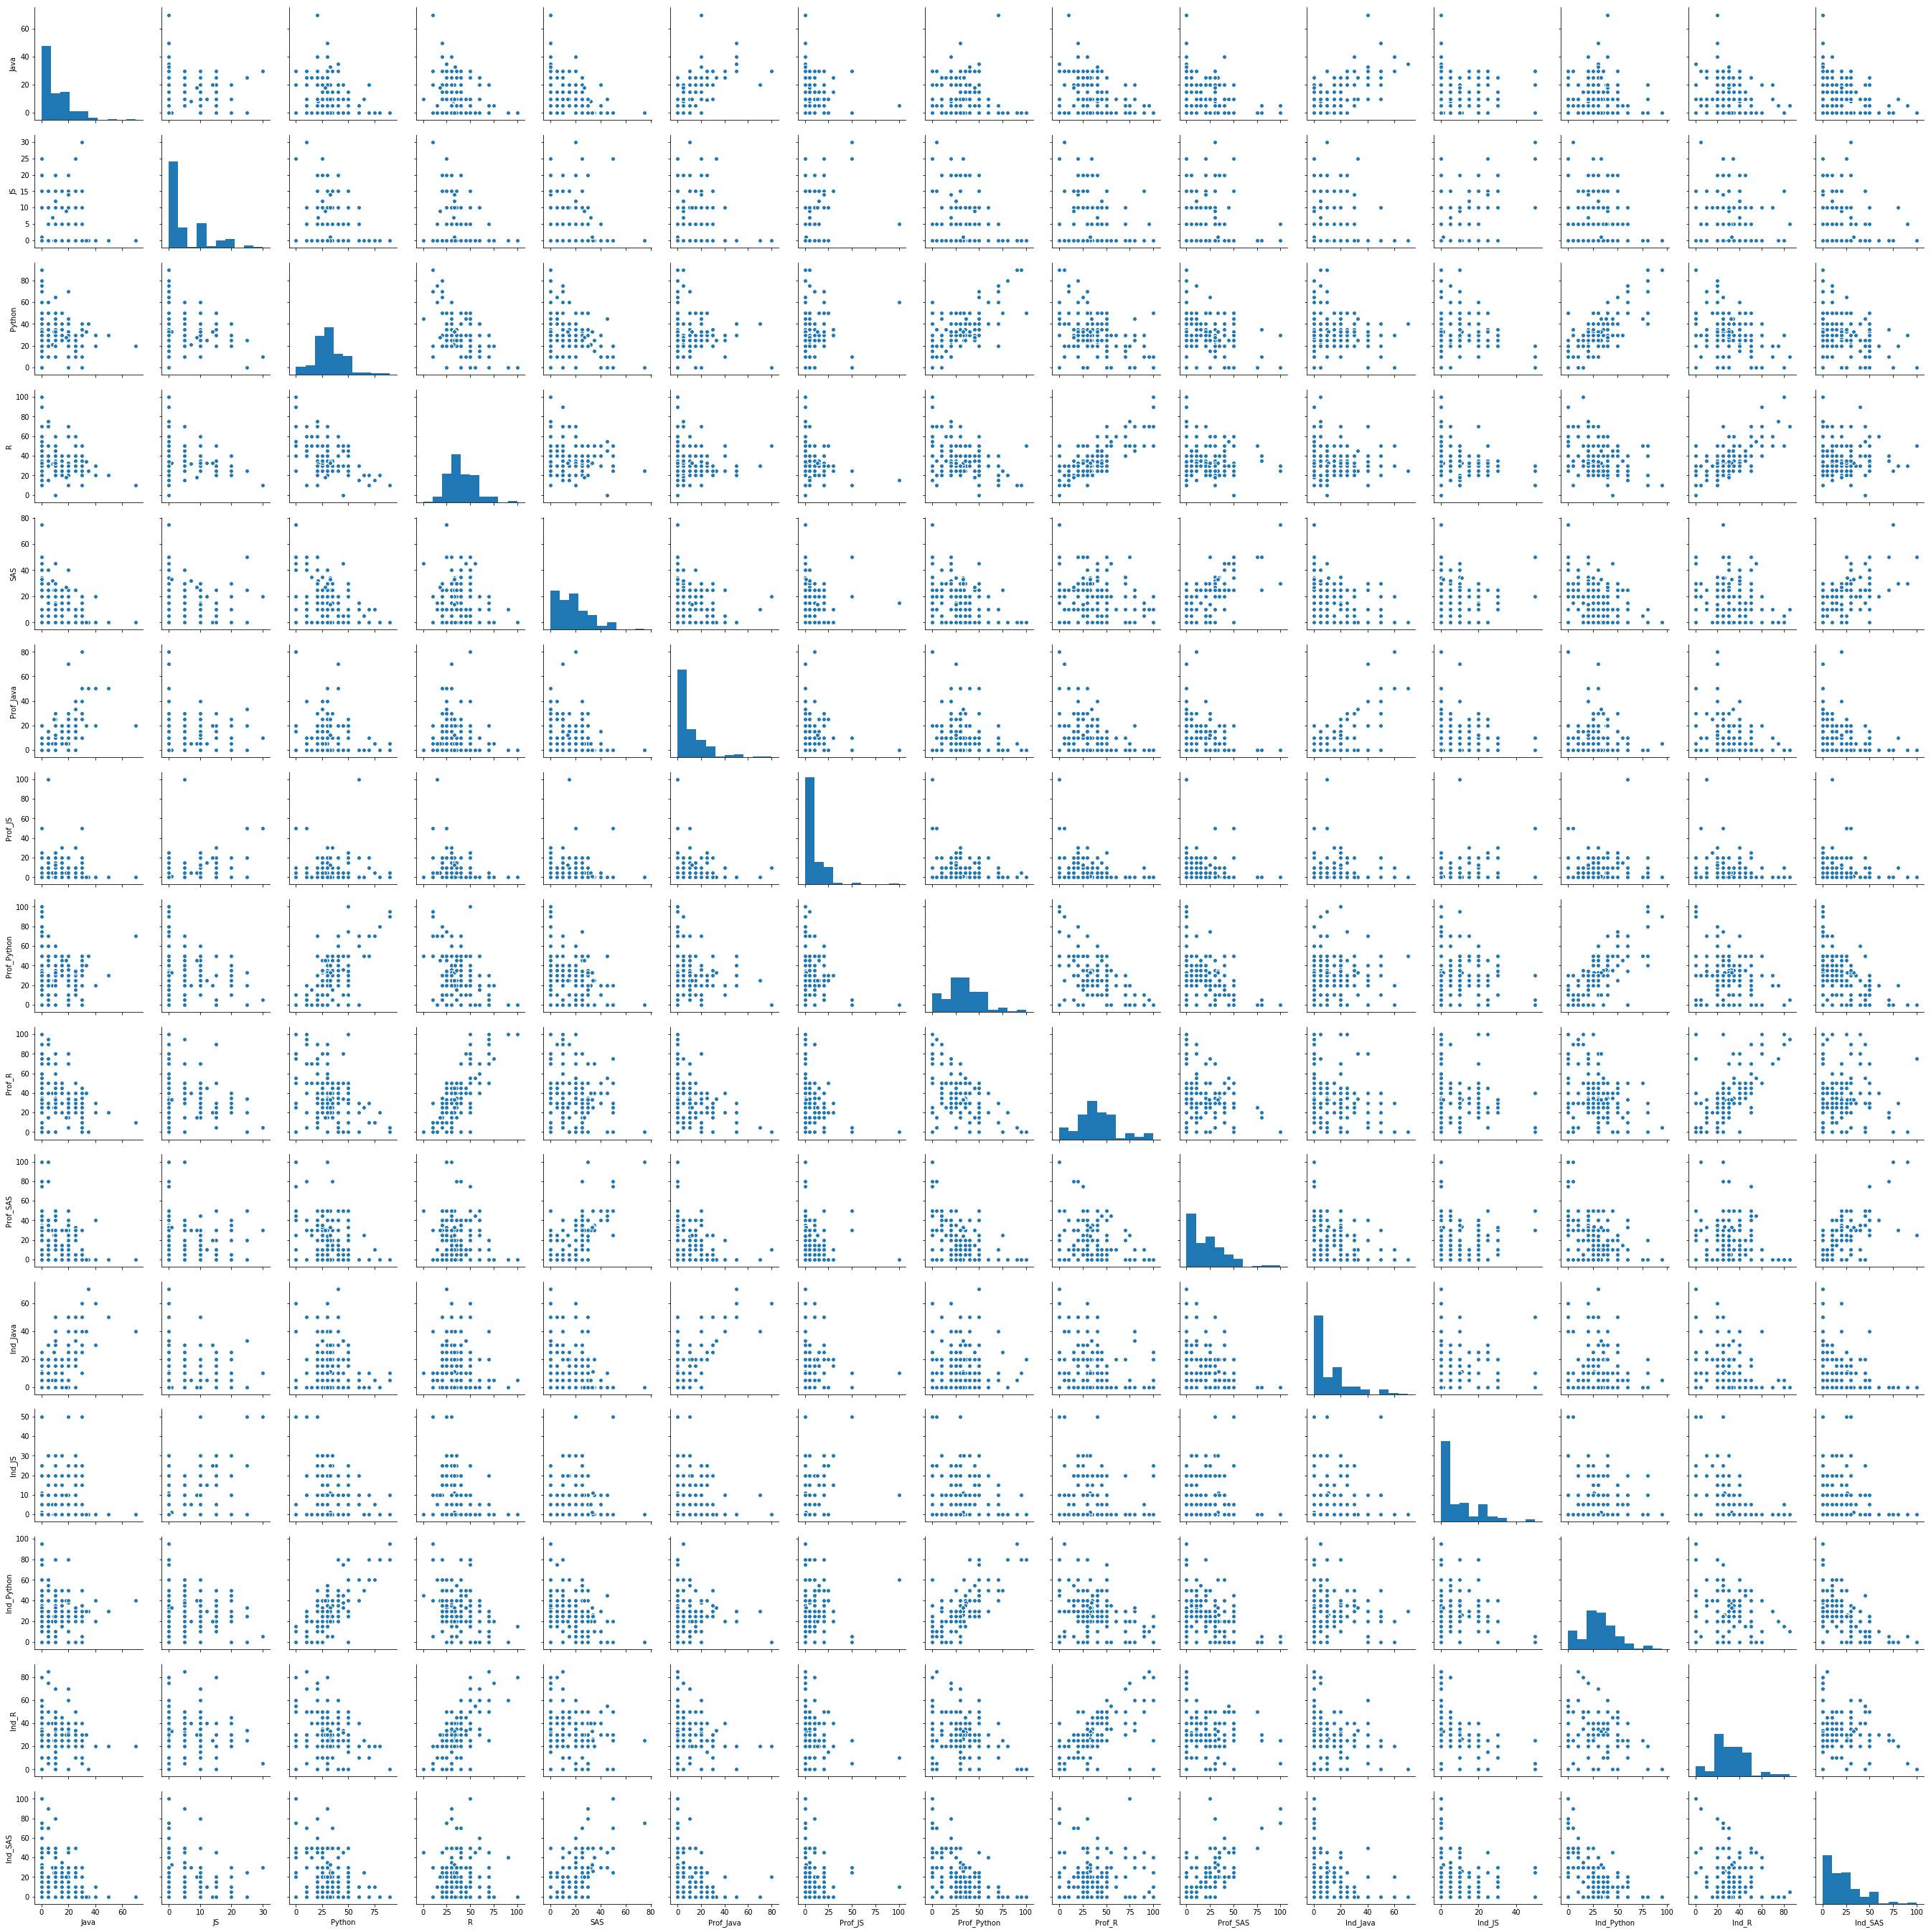

<Figure size 432x288 with 0 Axes>

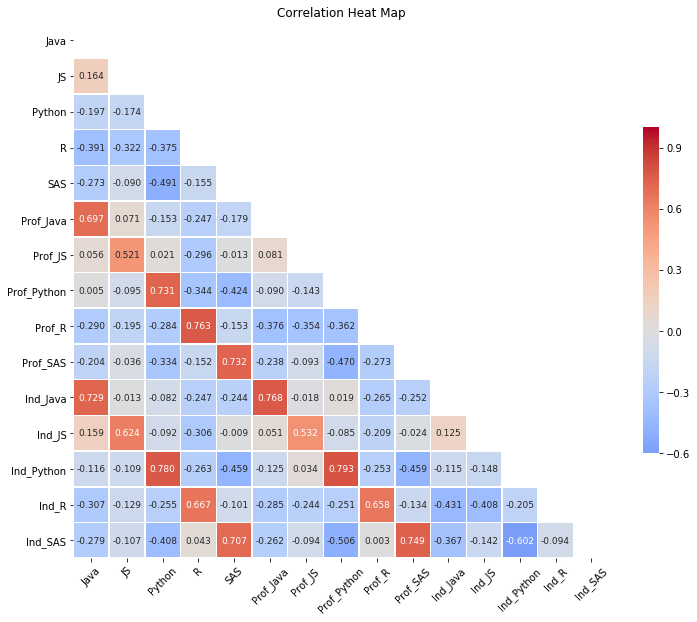

In [21]:
#Scatterplot matrix
sns.pairplot(software_df)

# examine intercorrelations among software preference variables
# with correlation matrix/heat map
corr_chart(df_corr = software_df) 

            Java        JS    Python         R       SAS
Java    1.000000  0.164302 -0.197282 -0.391172 -0.273014
JS      0.164302  1.000000 -0.173517 -0.321997 -0.090473
Python -0.197282 -0.173517  1.000000 -0.374659 -0.491077
R      -0.391172 -0.321997 -0.374659  1.000000 -0.155090
SAS    -0.273014 -0.090473 -0.491077 -0.155090  1.000000


Text(0.5,1,'Correlation Heat Map')

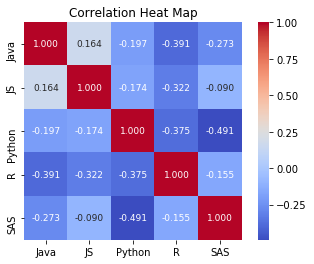

In [22]:
mycorr=software_df_1.corr()
print(mycorr)
sns.heatmap(mycorr, cmap="coolwarm", square=1, annot = True, annot_kws={'size':9}, fmt='.3f')
plt.title("Correlation Heat Map")

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


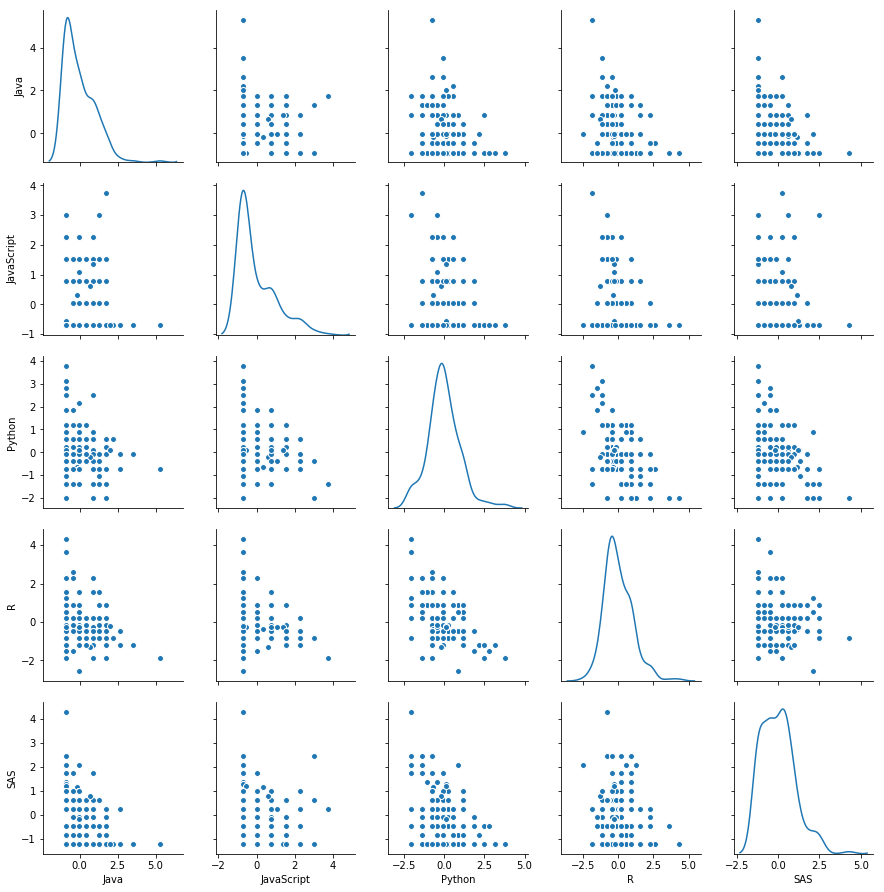

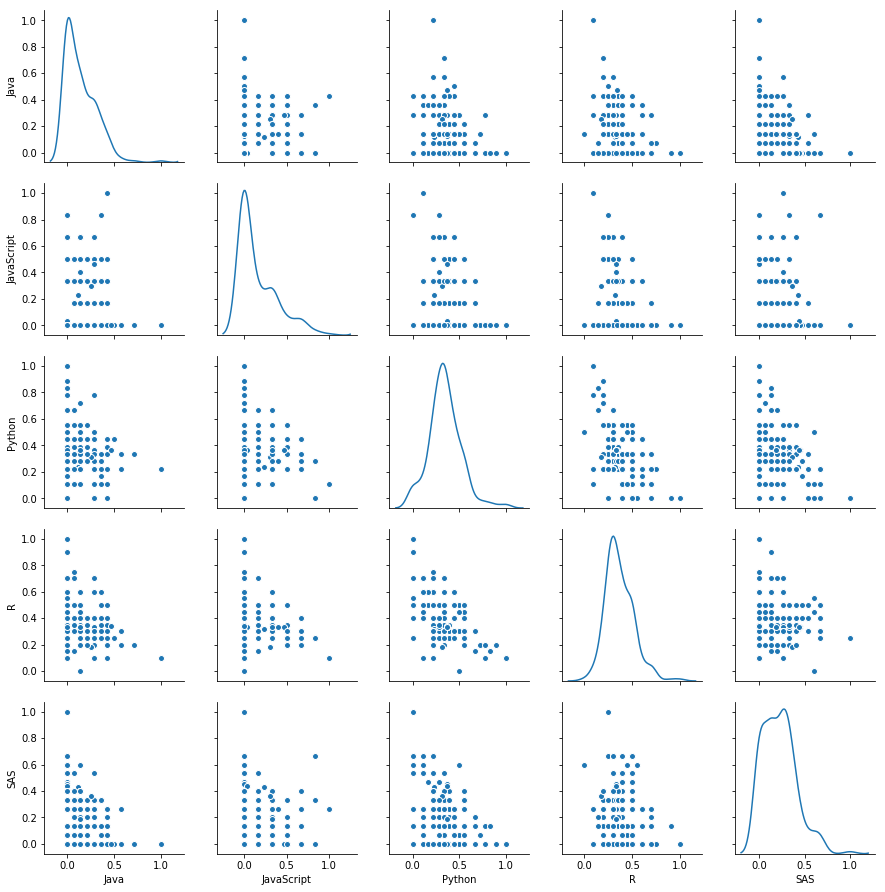

In [25]:
# ----------------------------------------------------------
# transformation code added with version v005
# ----------------------------------------------------------
# transformations a la Scikit Learn
# documentation at http://scikit-learn.org/stable/auto_examples/
#                  preprocessing/plot_all_scaling.html#sphx-glr-auto-
#                  examples-preprocessing-plot-all-scaling-py
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing

#Typical location / scale transformation
X_train = np.array(software_df_1)
scaler = preprocessing.StandardScaler().fit(X_train)
scaler.mean_
scaler.scale_
newx=scaler.transform(X_train)
dataset = pd.DataFrame({'Java':newx[:,0],'JavaScript':newx[:,1], 'Python':newx[:,2], 'R':newx[:,3],'SAS':newx[:,4]})
sns.pairplot(dataset, diag_kind='kde')

#Typical min/max transformation
min_max_scaler = preprocessing.MinMaxScaler()
newx2 = min_max_scaler.fit_transform(X_train)
dataset2 = pd.DataFrame({'Java':newx2[:,0],'JavaScript':newx2[:,1], 'Python':newx2[:,2], 'R':newx2[:,3],'SAS':newx2[:,4]})
sns.pairplot(dataset2, diag_kind="kde")



/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


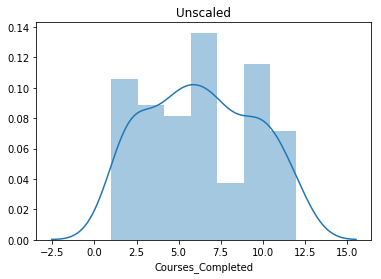

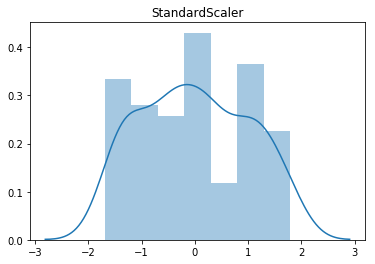

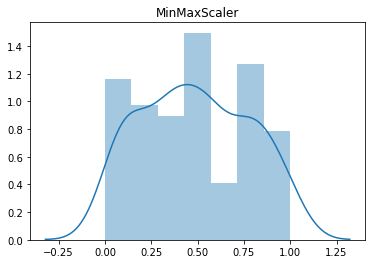

In [26]:
# transformations a la Scikit Learn
# select variable to examine, eliminating missing data codes
X = survey_df['Courses_Completed'].dropna()

# Seaborn provides a convenient way to show the effects of transformations
# on the distribution of values being transformed
# Documentation at https://seaborn.pydata.org/generated/seaborn.distplot.html

unscaled_fig, ax = plt.subplots()
sns.distplot(X).set_title('Unscaled')
unscaled_fig.savefig('Transformation-Unscaled' + '.pdf', 
    bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
    orientation='portrait', papertype=None, format=None, 
    transparent=True, pad_inches=0.25, frameon=None)  

Y = np.array(X).reshape(-1, 1)

standard_fig, ax = plt.subplots()
sns.distplot(StandardScaler().fit_transform(Y)).set_title('StandardScaler')
standard_fig.savefig('Transformation-StandardScaler' + '.pdf', 
    bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
    orientation='portrait', papertype=None, format=None, 
    transparent=True, pad_inches=0.25, frameon=None)

minmax_fig, ax = plt.subplots()
sns.distplot(MinMaxScaler().fit_transform(Y)).set_title('MinMaxScaler')
minmax_fig.savefig('Transformation-MinMaxScaler' + '.pdf', 
    bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
    orientation='portrait', papertype=None, format=None, 
    transparent=True, pad_inches=0.25, frameon=None) 



In [33]:
course_interest = valid_survey_input.loc[:, 'Python_Course_Interest':'Systems_Analysis_Course_Interest']
course_interest.head()

,Python_Course_Interest,Foundations_DE_Course_Interest,Analytics_App_Course_Interest,Systems_Analysis_Course_Interest
RespondentID,,,,
5135740122,50.0,90.0,51.0,50.0
5133300037,20.0,50.0,90.0,50.0
5132253300,100.0,70.0,100.0,60.0
5132096630,85.0,60.0,90.0,82.0
5131990362,60.0,10.0,40.0,80.0


In [36]:
course_interest.describe()

,Python_Course_Interest,Foundations_DE_Course_Interest,Analytics_App_Course_Interest,Systems_Analysis_Course_Interest
count,206.000000,200.000000,203.000000,200.000000
mean,73.529126,58.045000,55.201970,53.630000
std,29.835429,32.588079,34.147954,33.539493
min,0.000000,0.000000,0.000000,0.000000
25%,53.000000,29.500000,25.000000,21.500000
50%,82.500000,60.000000,60.000000,51.500000
75%,100.000000,89.250000,85.000000,80.250000
max,100.000000,100.000000,100.000000,100.000000


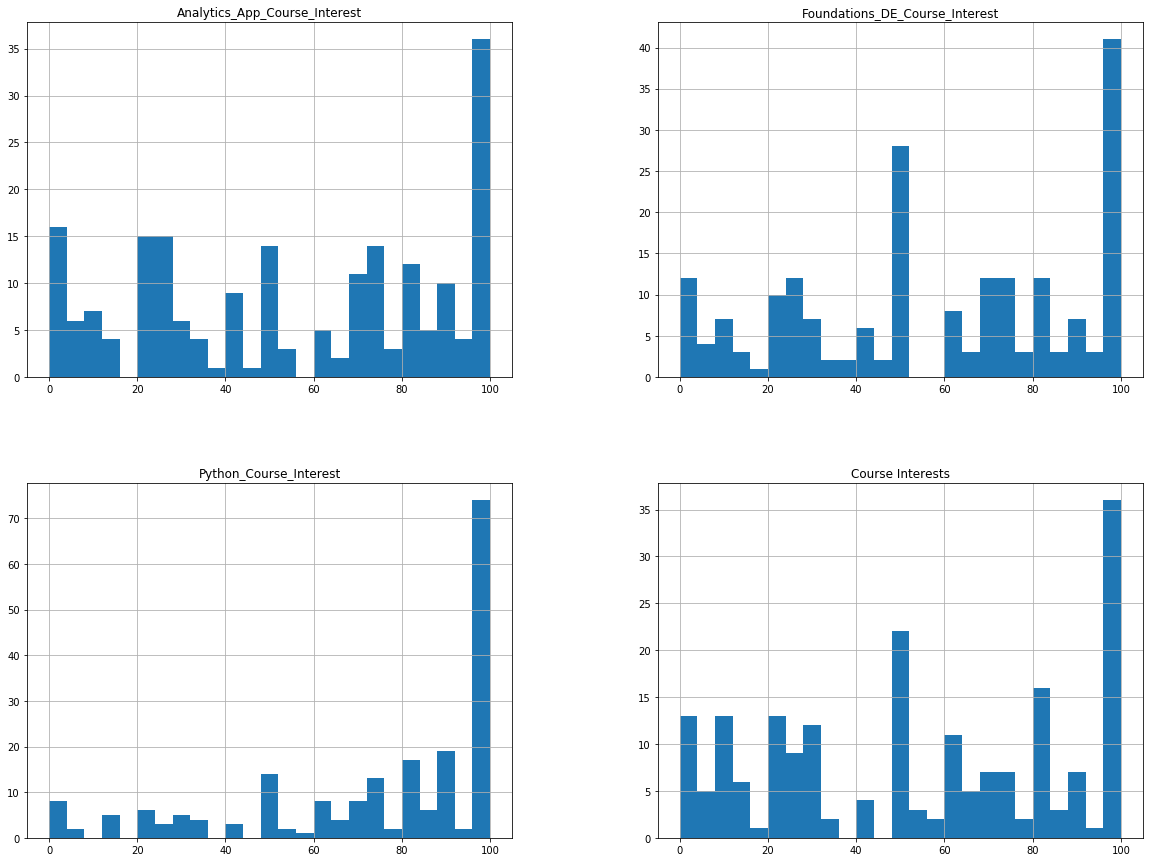

In [39]:
course_interest.hist(bins=25, figsize=(20,15))
plt.show()

Text(0.5,1,'Notched Boxplots for Course Interest')

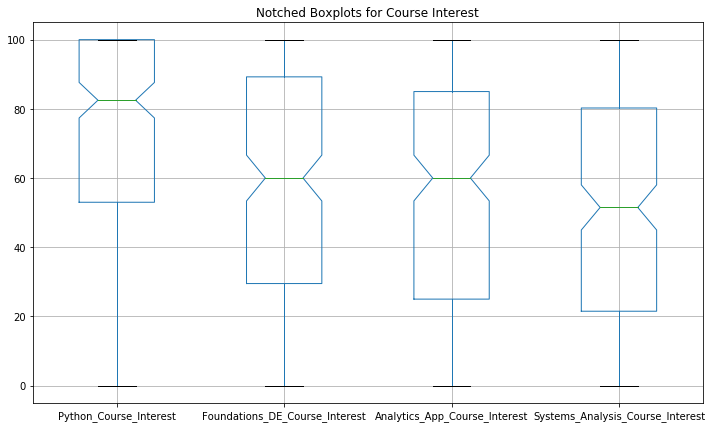

In [51]:
courses_plot = course_interest.plot.box(grid=1, notch=1, figsize=(12,7))
courses_plot.set_title("Notched Boxplots for Course Interest")